In [ ]:
!pip install vader-multi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
!pip install torchtext

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation
import numpy as np
import pandas as pd

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
data_path = '/content/drive/MyDrive/comments.csv'

In [ ]:
data = pd.read_csv(data_path)
data = data.drop('Unnamed: 0', axis=1)
data = pd.DataFrame(data['comments'].value_counts().index, columns=['comments'])
data

,comments
0,Отличная книга
1,Книга пришла в целости и сохранности
2,"Красивое оформление, страницы белые, текст хор..."
3,Прекрасное красивое издание с приятным и привы...
4,Как всегда все супер у этого издательства! Все...
...,...
224,Всё соответствует описанию!!! 👍👍👍
225,"Книга отличная, но пришла в тонкой разорванной..."
226,Книга пришла в целости. Спасибо
227,Книга пришла в отличном состоянии покупкой дов...


In [ ]:
data.shape[0]

229

#  Анализ тональности текста

## Vader

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
data['Compound_rate'] = data['comments'].apply(lambda x: analyser.polarity_scores(x)['compound'])
data['Compound_rate'].value_counts()

Compound_rate
0.0000    10
0.4404     9
0.6249     8
0.5719     8
0.6597     6
          ..
0.9504     1
0.8357     1
0.8217     1
0.9615     1
0.8070     1
Name: count, Length: 156, dtype: int64

In [ ]:
result_vader = {
    'positive': data[data['Compound_rate'] > 0.0].shape[0],
    'negative': data[data['Compound_rate'] < 0.0].shape[0],
    'neutral': data[data['Compound_rate'] == 0.0].shape[0],
}

result_vader

{'positive': 200, 'negative': 19, 'neutral': 10}

In [ ]:
data.sample(10)

,comments,Compound_rate
11,"Книга пришла в отличном состоянии, упакована, ...",0.5719
201,Брала на подарок. Книга пришла целая. Но упако...,0.6124
163,"Книга пришла в хорошем состоянии, спасибо.",0.6597
8,Увлекательная книга! Всем советую. Качество пе...,0.8832
131,Такая книга и правда -лучший подарок! Рекомендую!,0.8872
144,Волшебство! Всё целое! Спасибо большое!),0.5826
52,"Книга красивая, в идеальном состоянии, сын дов...",0.9117
50,"Книга потрясающая, оформление выше всяких похв...",0.6114
189,Здравствуйте! Очень довольна покупкой. Книга п...,0.5963
225,Книга пришла в отличном состоянии покупкой дов...,0.8720


In [ ]:
data[data['Compound_rate'] < 0.0]

,comments,Compound_rate
37,"Обложка красивая, цена доступная, но страницы ...",-0.0900
44,Книга пришла в упаковке. Брака нет,-0.2960
93,Сама книга вполне. Хотя с хорошими иллюстрация...,-0.0644
120,"Слабая упаковка, пищевая пленка…",-0.4404
125,"Цена книги значительно была меньше, чем в ""Чит...",-0.1852
134,"По содержанию книги претензий нет, отличная эп...",-0.4068
135,"Книга хороша, только что лежа не почитать)",-0.1280
137,"Книга понравилась, но пришлось отказаться, так...",-0.2263
147,"Положили совершенно не ту книгу, пока перезака...",-0.7774
148,"Когда брала, посмотрела на размер и на то, что...",-0.9613


In [ ]:
data['comments'][data['Compound_rate'] < 0.0]

37     Обложка красивая, цена доступная, но страницы ...
44                    Книга пришла в упаковке. Брака нет
93     Сама книга вполне. Хотя с хорошими иллюстрация...
120                     Слабая упаковка, пищевая пленка…
125    Цена книги значительно была меньше, чем в "Чит...
134    По содержанию книги претензий нет, отличная эп...
135           Книга хороша, только что лежа не почитать)
137    Книга понравилась, но пришлось отказаться, так...
147    Положили совершенно не ту книгу, пока перезака...
148    Когда брала, посмотрела на размер и на то, что...
152    Купила книгу,проверять не стала,принесла домой...
158    Пришла практически без упаковки, в одной тонко...
180    Книга пришла убитая в хлам, вся кривая с рвано...
203    Продавец, скажите,вам жалко упаковки? Почему в...
206    Брала на подарок, книга пришла в пленке, приче...
208                         Повреждения. Отврат упаковка
210                                    Разорван корешок.
223    Книга отличная, но пришл

In [ ]:
positive_text = " ".join(np.array(data['comments'][data['Compound_rate'] > 0.0]))
negative_text = " ".join(np.array(data['comments'][data['Compound_rate'] < 0.0]))
neutral_text = " ".join(np.array(data['comments'][data['Compound_rate'] == 0.0]))

## NLTK

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def extract_features(tokens):
    return mark_negation(tokens)

In [ ]:
data_list = np.array(data['comments'])
stop_words = set(stopwords.words('russian'))
stemmer = SnowballStemmer("russian")

comment_rate_list = []

for comment in data_list:
    tokens = word_tokenize(comment)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    lemmatized_tokens = [stemmer.stem(token) for token in filtered_tokens]

    sentence = " ".join(lemmatized_tokens)
    comment_rate_list.append([comment, analyser.polarity_scores(sentence)['compound']])

In [ ]:
comment_rate_list = np.array(comment_rate_list)
comment_rate_list

array([['Отличная книга', '0.5719'],
       ['Красивое оформление, страницы белые, текст хорошо пропечатан. Шрифт в самый раз для комфортного чтения в 4 колонки, очень понравился такой стиль. \n\nБильбо здесь Торбинс. Для меня в целом это не критично.',
        '0.8122'],
       ['Хорошая книга,соответствует описанию ', '0.4404'],
       ['Прекрасное красивое издание с приятным и привычным переводом (Бильбо здесь Бэггинс, если вы понимаете о чем я). Покупала в подарок, друг остался доволен:)',
        '0.9719'],
       ['Как всегда все супер у этого издательства! Все пришло в идеале! Огромное спасибо',
        '0.8856'],
       ['Книга пришла в отличном состоянии', '0.5719'],
       ['Пришла за 5 дней в отличном состоянии. Страницы белые, легко переворачиваются, не шуршат на пальцах. Печать чёткая, шрифт удобный для четырёх столбцов. Книга прекрасно выглядит, достаточно хорошо прошита, при получении товара нашёл всё превосходным',
        '0.959'],
       ['Качество шикарное, все в цел

In [ ]:
comment_rate = pd.DataFrame(comment_rate_list, columns=['comments', 'rate'])
comment_rate['rate'] = comment_rate['rate'].apply(lambda x: float(x))

In [ ]:
result_with_preprocessing = {
    'positive': comment_rate[comment_rate['rate'] > 0.0].shape[0],
    'negative': comment_rate[comment_rate['rate'] < 0.0].shape[0],
    'neutral': comment_rate[comment_rate['rate'] == 0.0].shape[0],
}

result_with_preprocessing

{'positive': 199, 'negative': 15, 'neutral': 15}

# Суммаризация текстов

In [ ]:
!pip install razdel networkx pymorphy2 summa rouge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 91.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54386 sha256=eecc08df385d8d21506db187d47aa931f5210eb2ebfc5a74e2d61ab2a9107029
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=984972d7e94067617d8e3d056462f16424c04f0d281041f50e5ea503369919ec
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built summa docopt


## TextRank

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
import razdel


def calc_scores(references, predictions, metric="all"):
    print("Count: ", len(predictions))
    print("Ref: ", references[-1])
    print("Hyp: ", predictions[-1])

    if metric in ('bleu', 'all'):
        print("BLEU: ", corpus_bleu([[r] for r in references], predictions))
    elif metric in ('rouge', 'all'):
        rouge = Rouge()
        scores = rouge.get_scores(predictions, references, avg=True)
        print("ROUGE: ", scores)

In [ ]:
from itertools import combinations
import networkx as nx
import pymorphy2
import numpy as np

In [ ]:
def unique_words_similarity(words1, words2):
    """
    Подсчёт близости предложений (как пересечение слов)
    """
    words1 = set(words1)
    words2 = set(words2)

    if not len(words1) or not len(words2):
        return 0
    return len(words1.intersection(words2)) / (np.log10(len(words1)) + np.log10(len(words2)))

In [ ]:
def gen_text_rank_summary(text, calc_similarity=unique_words_similarity, summary_part=0.1, lower=True, morph=None):
    """
    summary с использованием TextRank
    """

    # разбиваем текст на предложения
    sentences = [sentence.text for sentence in razdel.sentenize(text)]
    n_sentences = len(sentences)

    # токенизация предложений
    sentences_words = [[token.text.lower() if lower else token.text for token in razdel.tokenize(sentence)] for sentence in sentences]

    # лемматизация
    if morph is not None:
        sentences_words = [[morph.parse(word)[0].normal_form for word in words] for words in sentences_words]

    # считаем близость для кажжой пары предложений
    pairs = combinations(range(n_sentences), 2)
    scores = [(i, j, calc_similarity(sentences_words[i], sentences_words[j])) for i, j in pairs]

    # строим граф, в котором веса на рёбрах равна близости между предложениями
    g = nx.Graph()
    g.add_weighted_edges_from(scores)

    # считаем PageRank
    pr = nx.pagerank(g)
    result = [(i, pr[i], s) for i, s in enumerate(sentences) if i in pr]
    result.sort(key=lambda x: x[1], reverse=True)

    # выбираем топ предложений
    n_summary_sentences = max(int(n_sentences * summary_part), 1)
    result = result[:n_summary_sentences]

    # востанавливаем оригинальный порядок
    result.sort(key=lambda x: x[0])

    # востановление текста
    predicted_summary = " ".join([sentence for i, proba, sentence in result])
    predicted_summary = predicted_summary.lower() if lower else predicted_summary

    return predicted_summary

In [ ]:
texts = {
    "pos": positive_text,
    "neg": negative_text,
    "neu": neutral_text
}

morph = pymorphy2.MorphAnalyzer()

In [ ]:
for key, value in texts.items():
    print(key)
    print(gen_text_rank_summary(value, morph=morph))
    print("-----------------------------------------------------")

pos
книга пришла в отличном состоянии, упакована, углы не помяты задняя часть обложки помята, листы ооочень тонкие, боишься перевернуть и порвать, сами листы бело-серого цвета. отличная книга, хороший шрифт, для ребенка очень удобный. книга пришла без повреждений, чему я очень рада, т.к.купила её в подарок. сын доволен... доволен. один минус, нет хоббита в книге с книгами всегда везёт, приходит все в целости и сохранности. очень понравилось) книга отличная, беру уже вторую из этой серии, первая была ведьмак, ребенок в восторге, рекомендую. книга пришла в отличном состоянии. книга просто шикарная, приехала в идеальном состоянии. хорошая книга,спасибо) книга дошла в отличном состоянии. книга пришла в хорошем качестве. спасибо, книга отличная, качество тоже. заказывала брату в армию, книга пришла в отличном состоянии, хорошо упакована👍🏼 🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗 всё хорошо, только чернила чуть мажутся очень хорошее качество. книга пришла аккуратно упакована, все в отличном состоянии. листы тонкова

## Navec (мера близости, рассчитанная с помощью эмбеддингов)

In [ ]:
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-04-18 19:57:52--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar.3’

navec_hudlit_v1_12B 100%[===================>]  50.56M  10.2MB/s    in 6.8s    

2024-04-18 19:58:01 (7.43 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar.3’ saved [53012480/53012480]



In [ ]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
from numpy.linalg import norm
import scipy.spatial.distance as ds


def vectorize_sum(words, embeddings):
    embedding_dim = embeddings['example'].shape[0]
    features = np.zeros([embedding_dim], dtype='float32')

    for word in words:
        if word in embeddings:
            features += embeddings[f'{word}']

    return features


def my_sim(text1, text2, embeddings=navec):
    v1, v2 = vectorize_sum(text1, embeddings), vectorize_sum(text2, embeddings)
    return ds.cosine(v1, v2)

In [ ]:
for key, value in texts.items():
    print(key)
    print(gen_text_rank_summary(value, calc_similarity=my_sim, morph=morph))
    print("-----------------------------------------------------")

pos
бильбо здесь торбинс. печать чёткая, шрифт удобный для четырёх столбцов. всем советую. рекомендую. доставка быстрая. рекомендую! иллюстрации чб. обложка твёрдая - красивая. рекомендую . рекомендую. дочка довольна! ребёнок доволен)))). толстая. листочки беленькие. листы качественные, обложка прочная. пришла в целости. страницы белые. иллюстрации черно-белые, на любителя. довольна покупкой! страницы ср.плотности. отличная упаковка. единственный дефект - это непроклей форзаца. упаковано аккуратно. покупкой довольна. обложка яркая, стильная, буквы золтые. согласна с предыдущим отзывом. рекомендую! трилогия в переводе муравьева/кистяковского. ребёнок доволен! здравствуйте! рекомендую к покупке. рекомендую! возврат. упаковка была надорвана. красивые иллюстрации. рекомендую.
-----------------------------------------------------
neg


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


слабая упаковка, пищевая пленка… неправильные вложения, поврежденный товар. нехорошо. отврат упаковка разорван корешок.
-----------------------------------------------------
neu
в реале даже круче чем на фото) дополню комментарий.
-----------------------------------------------------


## Summa

In [ ]:
from summa.summarizer import summarize

for key, value in texts.items():
    print(key)
    predicted_summary = summarize(value, ratio=0.05, language='russian').replace("\n", " ")
    print(predicted_summary)
    print("-----------------------------------------------------")

pos
Книга пришла в отличном состоянии, упакована, углы не помяты Задняя часть обложки помята, листы ооочень тонкие, боишься перевернуть и порвать, сами листы бело-серого цвета. Книга пришла в отличном состоянии. Книга пришла в хорошем качестве. ;-) Заказывала брату в армию, книга пришла в отличном состоянии, хорошо упакована👍🏼 🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗 Всё хорошо, только чернила чуть мажутся Очень хорошее качество. Книга пришла аккуратно упакована, все в отличном состоянии. Листы тонковаты, но я и не детям покупала))) Книга пришла в идеальном состоянии. И я тоже) Книга пришла быстро в целости и сохранности, спасибо, буду читать Отличное издание! В книге все три части..брала сыну-подростку на подарок..прочитав отзывы о переводе, пригла к выводу, что ланный-Кистяковский и Муравьев, для подростка подходит как нельзя лучше...качество книги на хорошее - переплет, бумага, шрифт,краска не воняет, на обложке тиснение золотого цвета, вообще на подарок за такие деньги супер! За свои деньги книга хорошая.

## Greedy summary


In [ ]:
import copy

def build_oracle_summary_greedy(text, gold_summary, calc_score, lower=True, max_sentences=5):
    """
    Жадное построение
    """
    gold_summary = gold_summary.lower() if lower else gold_summary

    # делим текст на предложения
    sentences = [sentence.text.lower() if lower else sentence.text for sentence in razdel.sentenize(text)][:max_sentences]
    n_sentences = len(sentences)
    oracle_summary_sentences = set()

    score = -1.0
    summaries = []

    for _ in range(n_sentences):
        for i in range(n_sentences):
            if i in oracle_summary_sentences:
                continue
            current_summary_sentences = copy.copy(oracle_summary_sentences)
            # добавим какое-то предложение к уже существующему summary
            current_summary_sentences.add(i)
            current_summary = " ".join([sentences[index] for index in sorted(list(current_summary_sentences))])

            # метрики
            current_score = calc_score(current_summary, gold_summary)
            summaries.append((current_score, current_summary_sentences))
        # Если метрики улучшаются, то пытаемся добавить ещё, иначе алгоритм заканчивается
        best_summary_score, best_summary_sentences = max(summaries)

        if best_summary_score <= score:
            break

        oracle_summary_sentences = best_summary_sentences
        score = best_summary_score

    oracle_summary = " ".join([sentences[index] for index in sorted(list(oracle_summary_sentences))])

    return oracle_summary, oracle_summary_sentences


def calc_single_score(pred_summary, gold_summary, rouge):
    return rouge.get_scores([pred_summary], [gold_summary], avg=True)['rouge-2']['f']

In [ ]:
rouge = Rouge()

for key, value in texts.items():
    print(key)
    print(build_oracle_summary_greedy(value, value, calc_score=lambda x, y: calc_single_score(x, y, rouge)))
    print("-----------------------------------------------------")

pos
('отличная книга красивое оформление, страницы белые, текст хорошо пропечатан. шрифт в самый раз для комфортного чтения в 4 колонки, очень понравился такой стиль. бильбо здесь торбинс. для меня в целом это не критично. хорошая книга,соответствует описанию  прекрасное красивое издание с приятным и привычным переводом (бильбо здесь бэггинс, если вы понимаете о чем я).', {0, 1, 2, 3, 4})
-----------------------------------------------------
neg
('обложка красивая, цена доступная, но страницы тонкие, а корка оторвалась ещё до того, как книга была дочитана( месяц после начала чтения, а книгу новой уже не назовешь. книга пришла в упаковке. брака нет сама книга вполне. хотя с хорошими иллюстрациями было бы лучше. брал из этой серии ведьмака, качество бумаги намного хуже.', {0, 1, 2, 3, 4})
-----------------------------------------------------
neu
('в реале даже круче чем на фото) дополню комментарий. в вопросах и ответах спрашивали про автора иллюстраций, так вот, это не алан ли, как отве

## Transformer

In [ ]:
!pip install transformers sentencepiece

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

MODEL_NAME = 'cointegrated/rut5-base-absum'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/977M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/828k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def summarize(text, n_words=None, compression=None, max_length=1000, num_beams=3, do_sample=False, repetition_penalty=10.0, **kwargs):
    if n_words:
        text = '[{}] '.format(n_words) + text
    elif compression:
        text = '[{0:.1g}] '.format(compression) + text
    x = tokenizer(text, return_tensors='pt', padding=True)
    with torch.inference_mode():
        out = model.generate(
            **x,
            max_length=max_length, num_beams=num_beams,
            do_sample=do_sample, repetition_penalty=repetition_penalty,
            **kwargs
        )
    return tokenizer.decode(out[0], skip_special_tokens=True)

In [ ]:
class_texts = [texts['pos'], texts['neg'], texts['neu']]

In [ ]:
summ_list = []
for top in class_texts:
    summ_list.append(summarize(' '.join(list(top))))

In [ ]:
summ_list

# Тематическое моделирование

### LDA

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 680.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=343d83a627518c7c86d8f49aa30e8bc7d9285985934b25cfbc612d8a08d77ecd
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import pymorphy2

import itertools

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from tqdm import tqdm_notebook
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
RAND = 10
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
morph.parse('книги')[0].normal_form

'книга'

1) Подготовка текста

In [ ]:
def preprocess_text(data, stopwords=stopwords.words('russian')):
    text = re.sub("ё", "е", data.lower())
    text = re.sub(r"([.,!?])", r" \1", text)
    text = re.sub(r"[^а-яА-Я\s]+", "", text)

    text = text.strip()

    text = [w for w in text.split() if w not in stopwords]
    text = [w for w in text if len(w) >= 3]

    return " ".join(text)

In [ ]:
def lemmatization_text(data, morph=morph):
    result = " ".join([morph.parse(x)[0].normal_form for x in data.split()])
    return result

In [ ]:
def get_result(data, morph=morph, stopwords=stopwords.words('russian')):
    result = preprocess_text(data)
    result = lemmatization_text(data)

    return result

2) Очистка текста

In [ ]:
def transform_data(data):
    transform_list = [get_result(data=i) for i in data]
    transform_list = [x for x in transform_list if x not in [None, '']]
    return transform_list

In [ ]:
train_list = transform_data(data['comments'])

In [ ]:
train_list[:3]

['отличный книга',
 'книга прийти в целость и сохранность',
 'красивый оформление, страница белые, текст хорошо пропечатан. шрифт в самый раз для комфортный чтение в 4 колонки, очень понравиться такой стиль. бильбо здесь торбинс. для я в целое это не критично.']

In [ ]:
# количество слов в предложениях
vector_ben = CountVectorizer(analyzer='word', min_df=3, ngram_range=(2, 3), stop_words=stopwords.words('russian'))
train_vector_ben = vector_ben.fit_transform(train_list)

In [ ]:
train_vector_ben

<229x57 sparse matrix of type '<class 'numpy.int64'>'
	with 314 stored elements in Compressed Sparse Row format>

In [ ]:
vector_ben.get_feature_names_out()

array(['брать подарок', 'брать подарок книга', 'бумага белая',
       'всё отлично', 'всё соответствовать', 'всё целое',
       'довольный покупкой', 'идеальный состоянии', 'качество бумага',
       'качество книга', 'книга большая', 'книга всё', 'книга красивая',
       'книга отличная', 'книга очень', 'книга прийти',
       'книга прийти отличный', 'книга прийти хороший',
       'книга прийти целая', 'книга просто', 'книга спасибо',
       'книга супер', 'книга хорошая', 'книга хороший',
       'красивый издание', 'красивый книга', 'красивый оформление',
       'купить подарок', 'отличный книга', 'отличный состоянии',
       'очень довольный', 'подарок книга', 'покупать подарок',
       'покупка довольна', 'прийти быстро', 'прийти идеальный',
       'прийти идеальный состоянии', 'прийти отличный',
       'прийти отличный состоянии', 'прийти хороший',
       'прийти хороший состоянии', 'прийти целая', 'прийти целый',
       'ребёнок доволен', 'страница белые', 'супер книга',
       'х

3) LDA

In [ ]:
lda_model_ben = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=10, n_jobs=-1)
lda_model_ben.fit(train_vector_ben)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=10)

In [ ]:
print(f"Перплексия: {lda_model_ben.perplexity(train_vector_ben)}")

Перплексия: 116.83917421667077


In [ ]:
def get_coherence_mean(model, texts, n_top_words=5):
    topics = model.components_

    n_top_words = 20
    texts = [[word for word in doc.split()] for doc in texts]

    # create the dictionary
    dictionary = corpora.Dictionary(texts)
    # Create a gensim dictionary from the word count matrix

    # Create a gensim corpus from the word count matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Get the top words for each topic from the components_ attribute
    top_words = []
    for topic in topics:
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [ ]:
get_coherence_mean(lda_model_ben, train_list)

0.37143132628374526

4) Подбор кол-ва тематик

In [ ]:
def compute_coherence_values(vec_train_text, test_text, min_topic=2, max_topic=15, step=1):
    coherence_value, model_list = [], []

    for num_topics in tqdm(range(min_topic, max_topic, step)):
        model = LatentDirichletAllocation(max_iter=10, n_components=num_topics, learning_method='online', random_state=10, n_jobs=-1)
        model.fit(vec_train_text)

        model_list.append(model)
        coherence_value.append(get_coherence_mean(model, test_text))

    return model_list, coherence_value

In [ ]:
model_list, coherence_value = compute_coherence_values(train_vector_ben, train_list)

100%|██████████| 13/13 [00:18<00:00,  1.45s/it]


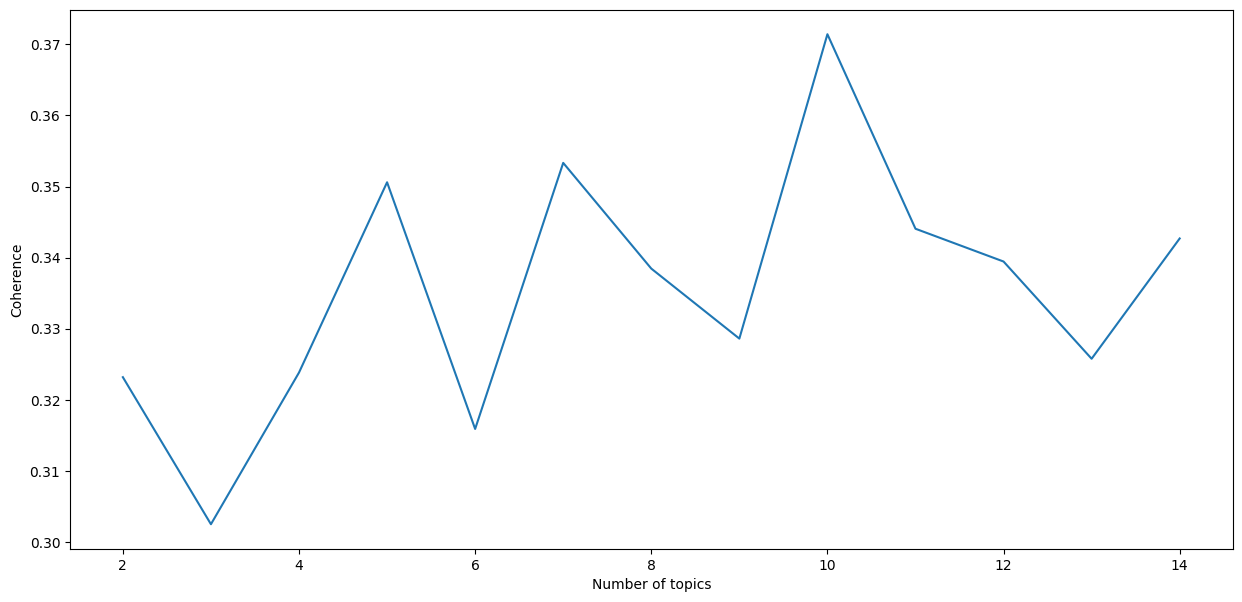

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(range(2, 15, 1), coherence_value)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()

In [ ]:
# вывод содержимого тематик
def show_topics(vectorizer, model, n_words=5):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_words = []

    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        top_words.append(feature_names.take(top_keyword_locs))

    return top_words

In [ ]:
show_topics(vectorizer=vector_ben, model=lda_model_ben)

[array(['брать подарок', 'книга отличная', 'подарок книга',
        'брать подарок книга', 'очень довольный'], dtype=object),
 array(['книга супер', 'книга большая', 'книга просто', 'качество книга',
        'прийти целый'], dtype=object),
 array(['книга красивая', 'хороший качество', 'красивый книга',
        'бумага белая', 'всё целое'], dtype=object),
 array(['читать удовольствием', 'целость сохранности', 'красивый издание',
        'прийти целая', 'супер книга'], dtype=object),
 array(['книга прийти', 'идеальный состоянии', 'прийти идеальный',
        'прийти идеальный состоянии', 'прийти хороший'], dtype=object),
 array(['отличный состоянии', 'отличный книга', 'книга прийти',
        'прийти отличный', 'прийти отличный состоянии'], dtype=object),
 array(['хороший издание', 'страница белые', 'книга прийти',
        'шрифт удобный', 'книга прийти целая'], dtype=object),
 array(['всё отлично', 'всё соответствовать', 'книга хороший', 'книга всё',
        'качество бумага'], dtype=obje

## Кластеризация

In [ ]:
!pip install transformers sentencepiece

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/521k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")

model.safetensors:   0%|          | 0.00/516M [00:00<?, ?B/s]

In [ ]:
sentences = list(set(list(data['comments'])))
embeddings_list = []

for s in sentences:
    encoded_input = tokenizer(s, padding=True, truncation=True, max_length=64, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embedding = model_output.pooler_output
    embeddings_list.append((embedding)[0].numpy())

embeddings = np.asarray(embeddings_list)

Оптимальное количество кластеров

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def determine_k(embeddings):
    k_min = 2

    clusters = [x for x in range(2, k_min * 11)]

    metrics = []

    for i in clusters:
        metrics.append((KMeans(n_clusters=i).fit(embeddings)).inertia_)

    k = elbow(k_min, clusters, metrics)
    return k

def elbow(k_min, clusters, metrics):
    score = []

    for i in range(k_min, clusters[-3]):
        y1 = np.array(metrics)[:i + 1]
        y2 = np.array(metrics)[i:]

        df1 = pd.DataFrame({'x': clusters[:i + 1], 'y': y1})
        df2 = pd.DataFrame({'x': clusters[i:], 'y': y2})

        reg1 = LinearRegression().fit(np.asarray(df1.x).reshape(-1, 1), df1.y)
        reg2 = LinearRegression().fit(np.asarray(df2.x).reshape(-1, 1), df2.y)

        y1_pred = reg1.predict(np.asarray(df1.x).reshape(-1, 1))
        y2_pred = reg2.predict(np.asarray(df2.x).reshape(-1, 1))

        score.append(mean_squared_error(y1, y1_pred) + mean_squared_error(y2, y2_pred))

    return np.argmin(score) + k_min

In [ ]:
k_opt = determine_k(embeddings)

In [ ]:
kmeans = KMeans(n_clusters = k_opt, random_state = 42).fit(embeddings)
kmeans_labels = kmeans.labels_

In [ ]:
data_new = pd.DataFrame()
data_new['text'] = sentences
data_new['label'] = kmeans_labels
data_new['embedding'] = list(embeddings)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

kmeans_centers = kmeans.cluster_centers_
top_texts_list = []

for i in range (0, k_opt):
    cluster = data_new[data_new['label'] == i]
    embeddings = list(cluster['embedding'])
    texts = list(cluster['text'])
    distances = [euclidean_distances(kmeans_centers[0].reshape(1, -1), e.reshape(1, -1))[0][0] for e in embeddings]
    scores = list(zip(texts, distances))
    top_3 = sorted(scores, key=lambda x: x[1])[:3]
    top_texts = list(zip(*top_3))[0]
    top_texts_list.append(top_texts)

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

MODEL_NAME = 'cointegrated/rut5-base-absum'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/977M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/828k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
def summarize(
    text, n_words=None, compression=None,
    max_length=1000, num_beams=3, do_sample=False, repetition_penalty=10.0,
    **kwargs
):
    if n_words:
        text = '[{}] '.format(n_words) + text
    elif compression:
        text = '[{0:.1g}] '.format(compression) + text
    # x = tokenizer(text, return_tensors='pt', padding=True).to(model.device)
    x = tokenizer(text, return_tensors='pt', padding=True)
    with torch.inference_mode():
        out = model.generate(
            **x,
            max_length=max_length, num_beams=num_beams,
            do_sample=do_sample, repetition_penalty=repetition_penalty,
            **kwargs
        )
    return tokenizer.decode(out[0], skip_special_tokens=True)

In [ ]:
summ_list = []
for top in top_texts_list:
    summ_list.append(summarize(' '.join(list(top))))

In [ ]:
summ_list

['Книга пришла в заводскую пленку, без повреждений. За это отдельное спасибо!',
 'Великолепная книга.',
 '🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️🤗❤️',
 'Покупала в подарок Книгу Ведьмака.']